
# Result Analysis on VGGNet

In [1]:
import os
import sys

ROOT_PATH = os.getcwd()
ROOT_PATH = os.path.dirname(ROOT_PATH)
ROOT_PATH = os.path.dirname(ROOT_PATH)
sys.path.append(ROOT_PATH)


In [2]:
import pandas as pd
import numpy as np

import dataset
import evaluate
import metric
import util
import visualize
import densenet169

Using TensorFlow backend.


## Training

Let's train a model that takes in all body parts first.
The model use a 16 layer VGGNet with 3 colour channels. All weights are randomly initialized. It uses Adom optimizer with 
    beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False

Image perturbation includes:
    rotation_range=30,
    fill_mode="constant",
    cval=0,
    horizontal_flip=True
    
All images are resized to 224*224 px

In [5]:
# Training Configurations
bpart = "all"
grayscale = False
batch_size = 16
learning_rate = 0.0001
epochs = 40
weight="imagenet"
resize=True
decay=0
reload=True

In [4]:
model = densenet169.DenseNet169(grayscale=grayscale, weight=weight, resize=resize)
history, model_path, result_path = model.train(batch_size=batch_size, learning_rate=learning_rate, epochs=epochs, bpart=bpart, decay=decay, reload=reload)

****** Building Model
****** Preparing Input
****** Preparing Training Image Generator
****** Loading Validation Inputs
****** Starting Training: 11-16-14
Epoch 1/40
 - 1848s - loss: 0.2614 - binary_accuracy: 0.7373 - batch_recall: 0.6963 - global_recall: 0.6816 - global_kappa: 0.4556 - val_loss: 0.2341 - val_binary_accuracy: 0.7876 - val_batch_recall: 0.3815 - val_global_recall: 0.7196 - val_global_kappa: 0.5718
Epoch 2/40
 - 986s - loss: 0.2358 - binary_accuracy: 0.7754 - batch_recall: 0.7263 - global_recall: 0.7098 - global_kappa: 0.5317 - val_loss: 0.2483 - val_binary_accuracy: 0.7873 - val_batch_recall: 0.3368 - val_global_recall: 0.6405 - val_global_kappa: 0.5685
Epoch 3/40
 - 986s - loss: 0.2290 - binary_accuracy: 0.7876 - batch_recall: 0.7382 - global_recall: 0.7243 - global_kappa: 0.5570 - val_loss: 0.2458 - val_binary_accuracy: 0.7413 - val_batch_recall: 0.4467 - val_global_recall: 0.8484 - val_global_kappa: 0.4858
Epoch 4/40
 - 1002s - loss: 0.2229 - binary_accuracy: 0.7962 

Epoch 31/40
 - 1026s - loss: 0.1354 - binary_accuracy: 0.8870 - batch_recall: 0.8765 - global_recall: 0.8661 - global_kappa: 0.7658 - val_loss: 0.2540 - val_binary_accuracy: 0.8251 - val_batch_recall: 0.4018 - val_global_recall: 0.7647 - val_global_kappa: 0.6477
Epoch 32/40
 - 1019s - loss: 0.1358 - binary_accuracy: 0.8862 - batch_recall: 0.8765 - global_recall: 0.8675 - global_kappa: 0.7642 - val_loss: 0.2517 - val_binary_accuracy: 0.8236 - val_batch_recall: 0.4021 - val_global_recall: 0.7654 - val_global_kappa: 0.6446
Epoch 33/40
 - 986s - loss: 0.1381 - binary_accuracy: 0.8870 - batch_recall: 0.8782 - global_recall: 0.8668 - global_kappa: 0.7659 - val_loss: 0.2540 - val_binary_accuracy: 0.8239 - val_batch_recall: 0.3999 - val_global_recall: 0.7608 - val_global_kappa: 0.6451
Epoch 34/40
 - 1006s - loss: 0.1368 - binary_accuracy: 0.8860 - batch_recall: 0.8755 - global_recall: 0.8653 - global_kappa: 0.7639 - val_loss: 0.2586 - val_binary_accuracy: 0.8236 - val_batch_recall: 0.3976 - va

*Note:* the model saved has the minimum validation loss, which happens at epoch 4

#### Training history

In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


d:\code\mura\env\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['resize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


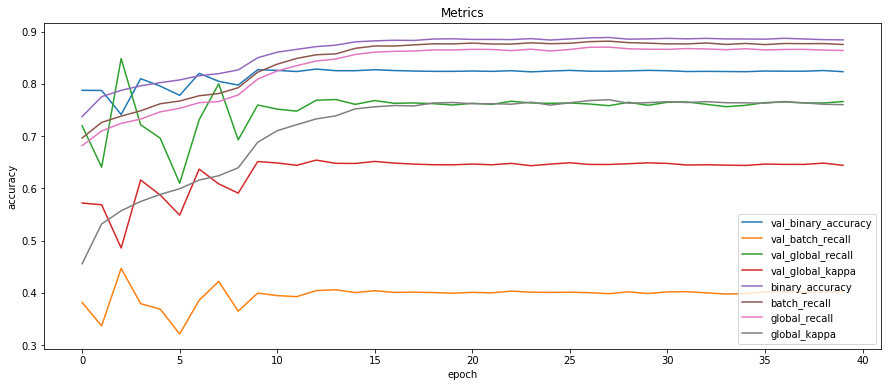

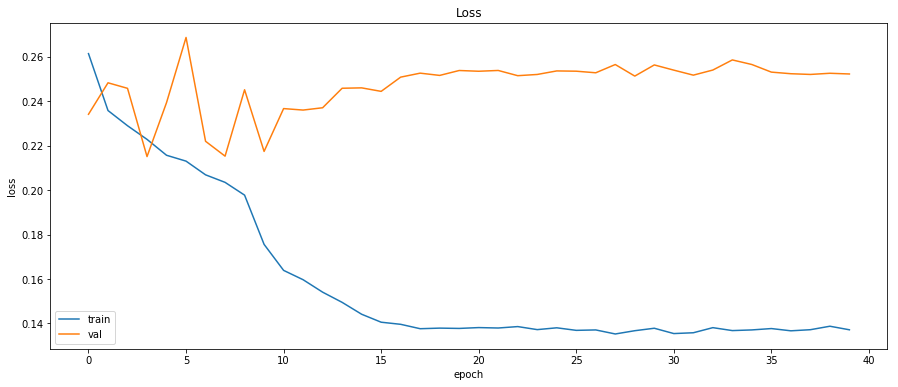

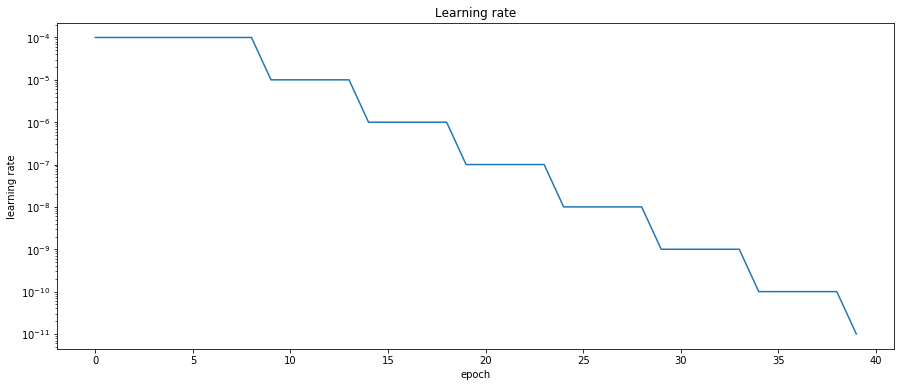

In [19]:
visualize.plot_history(history)

## Weighted Cross Entropy

This implementation used weighted cross entropy loss. In contrast with standard binary cross entropy loss using the same model, the weighted version clearly gave it a boost at the begining of the training, in which the validation kappa started more than 0.1 higher compare to standard. It also gave the model better generalization at the begining of the training, that pushed the validation loss lower than training loss.

However, the weighted loss ends up converging to similar validation kappa compare to standard version, with maximum kappa being only 0.01 higher.

The intuition I got from this is that the weighted cross entropy loss is good at targeting generalization problems, preventing the model to guess the same based on the distribution of the input dataset. But once the model learnt enough about the features, it will converge to the same point as the standard version, as it is still cross entropy loss, and defines the success of the model in the same way. 

### Metrics

In [7]:
val_df = pd.read_csv(result_path)
evaluate.evl_result(val_df)

****** Evaluation per Image
Accuracy:  0.8098217078511104
Recall:    0.7215686274509804
Precision: 0.8584758942457231
Kappa:     0.6164300519852424
Contingency Table:
 1104            182
  426           1485
Number of Inputs: 3197
****** Evaluation per Study Using Highest Score
Accuracy:  0.8065054211843202
Recall:    0.7862453531598513
Precision: 0.7833333333333333
Kappa:     0.6090301652044602
Contingency Table:
  423            117
  115            544
Number of Inputs: 1199
****** Evaluation per Study Using Lowest Score
Accuracy:  0.7973311092577148
Recall:    0.6133828996282528
Precision: 0.9041095890410958
Kappa:     0.5777171620840137
Contingency Table:
  330             35
  208            626
Number of Inputs: 1199
****** Evaluation per Study Using Average Score
Accuracy:  0.8265221017514596
Recall:    0.7230483271375465
Precision: 0.8683035714285714
Kappa:     0.6438101821568026
Contingency Table:
  389             59
  149            602
Number of Inputs: 1199


Both averaging or picking the max prediction score from each image of the same study achieves the better overall result. Apperantly having more images helps the model determing whether there is an abnormal.

Interestingly, averaging the prediction score from each image of the same study achieves the best kappa. It does make sense however compare to the other aggregation, since averaging does not favor false positive or false negative.

#### Let's look at each body part

In [8]:
for g, df in val_df.groupby(val_df["body_part"]):
    print("****** Evaluation per body part: {} ******".format(g))
    evaluate.evl_result(df)
    print("\n\n")

****** Evaluation per body part: elbow ******
****** Evaluation per Image
Accuracy:  0.8559139784946237
Recall:    0.7695652173913043
Precision: 0.9267015706806283
Kappa:     0.711273805662388
Contingency Table:
  177             14
   53            221
Number of Inputs: 465
****** Evaluation per Study Using Highest Score
Accuracy:  0.8417721518987342
Recall:    0.7727272727272727
Precision: 0.8360655737704918
Kappa:     0.6712169136007988
Contingency Table:
   51             10
   15             82
Number of Inputs: 158
****** Evaluation per Study Using Lowest Score
Accuracy:  0.8227848101265823
Recall:    0.6212121212121212
Precision: 0.9318181818181818
Kappa:     0.6176978914621498
Contingency Table:
   41              3
   25             89
Number of Inputs: 158
****** Evaluation per Study Using Average Score
Accuracy:  0.8670886075949367
Recall:    0.7272727272727273
Precision: 0.9411764705882353
Kappa:     0.7177131189382334
Contingency Table:
   48              3
   18          

## Visualization

#### Attention

In [21]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

Populating the interactive namespace from numpy and matplotlib


d:\code\mura\env\lib\site-packages\keras\models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


(224, 224, 3)


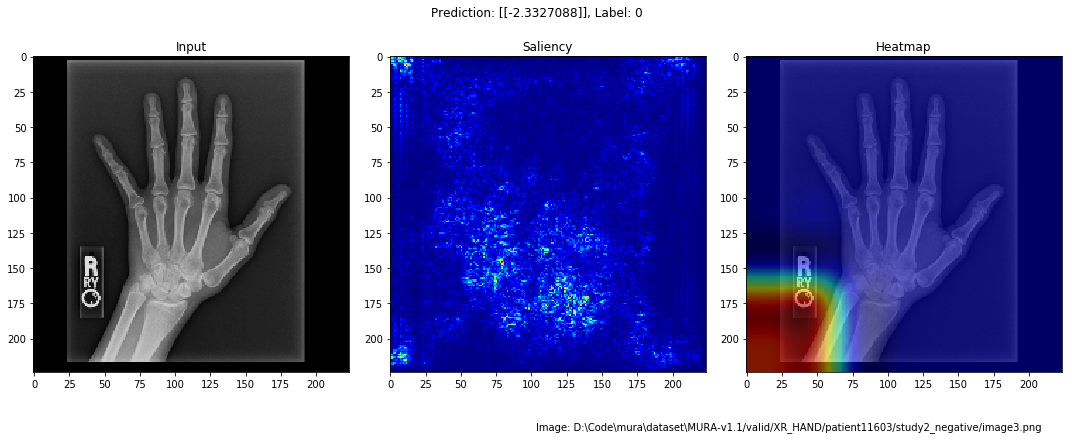

(224, 224, 3)


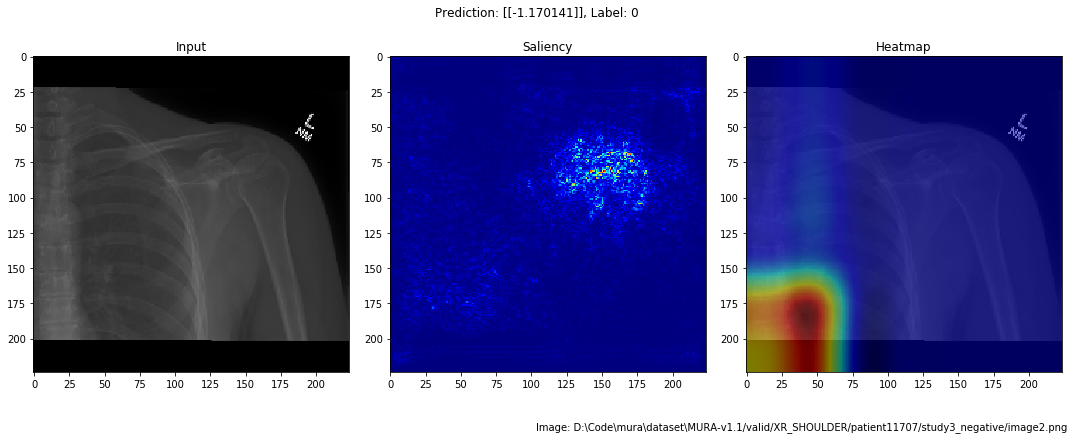

(224, 224, 3)


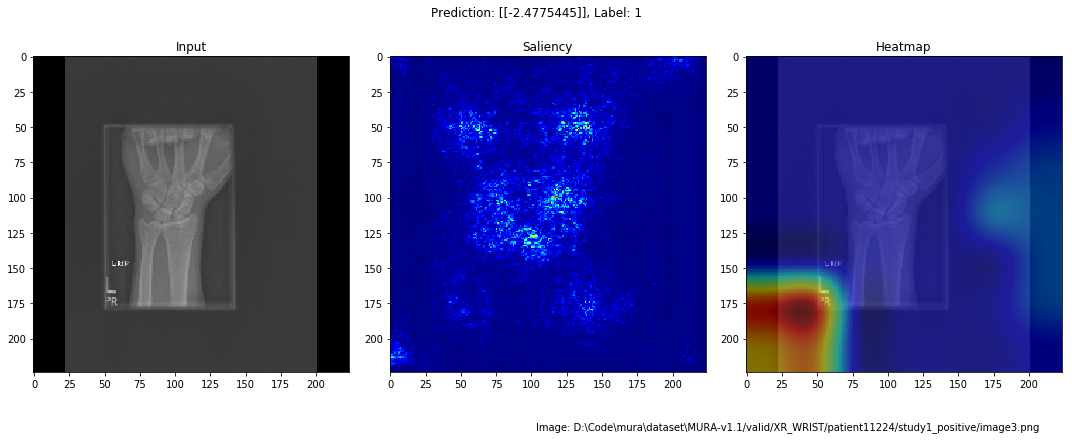

(224, 224, 3)


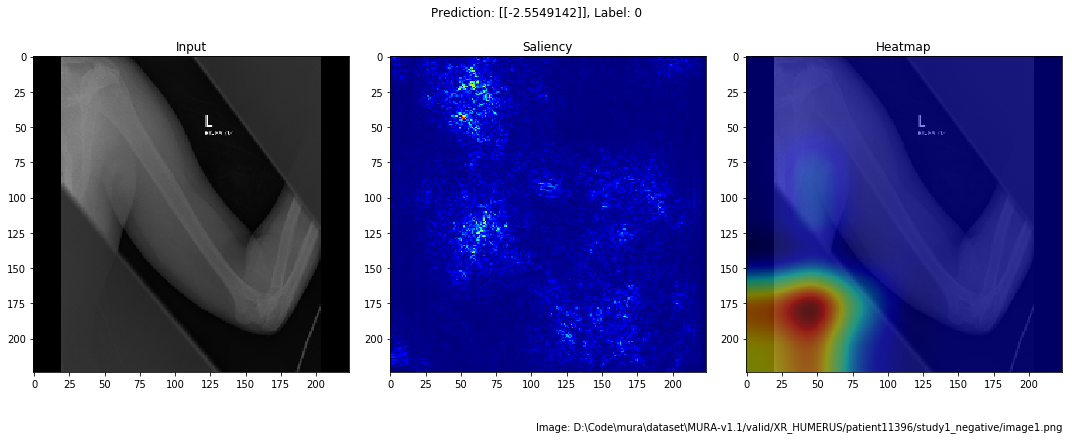

(224, 224, 3)


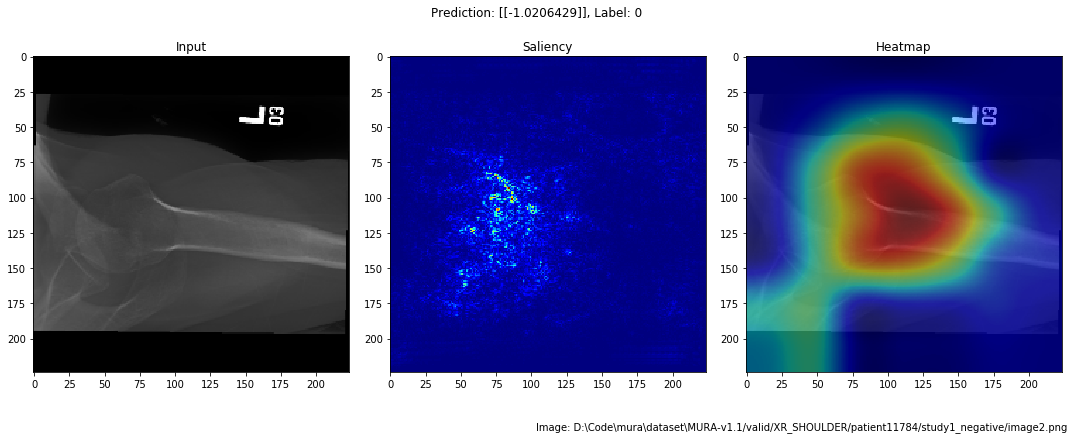

(224, 224, 3)


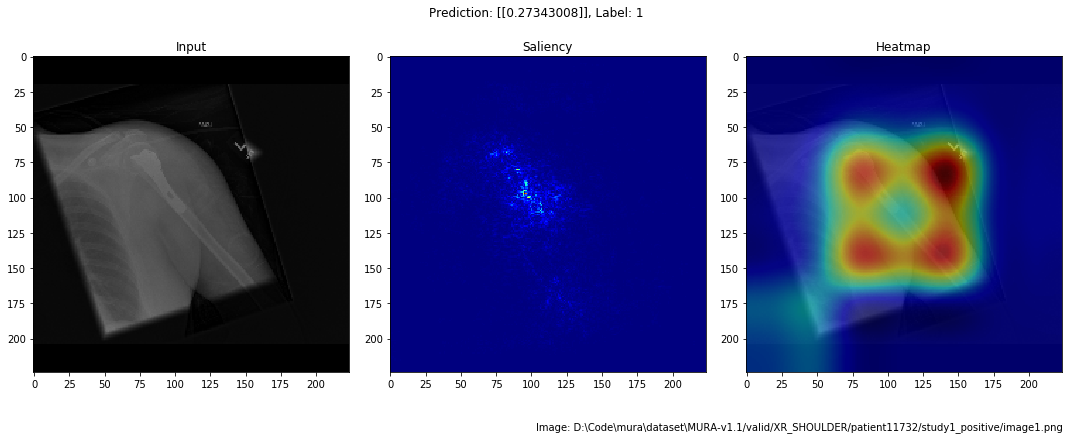

(224, 224, 3)


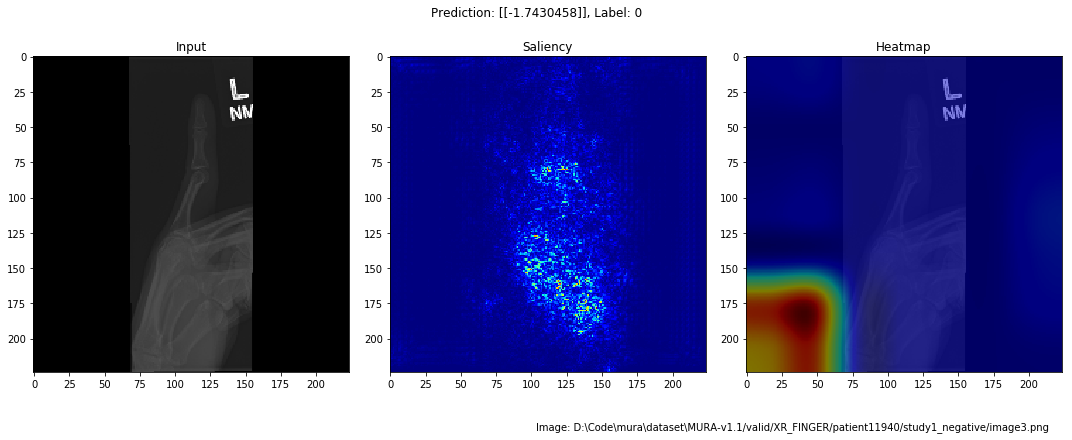

(224, 224, 3)


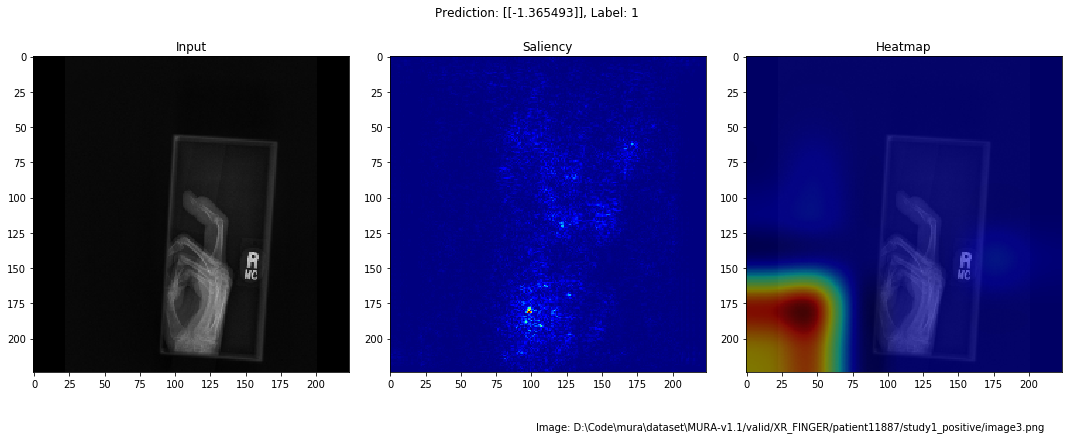

(224, 224, 3)


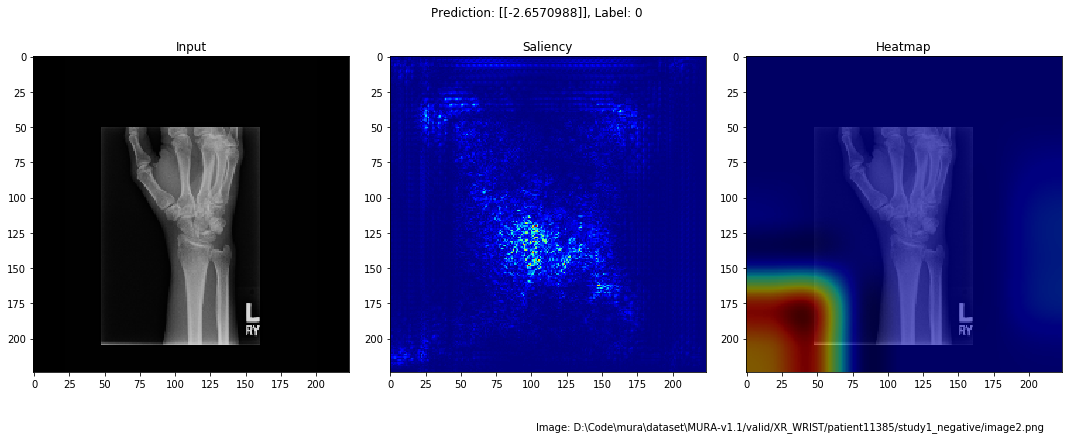

(224, 224, 3)


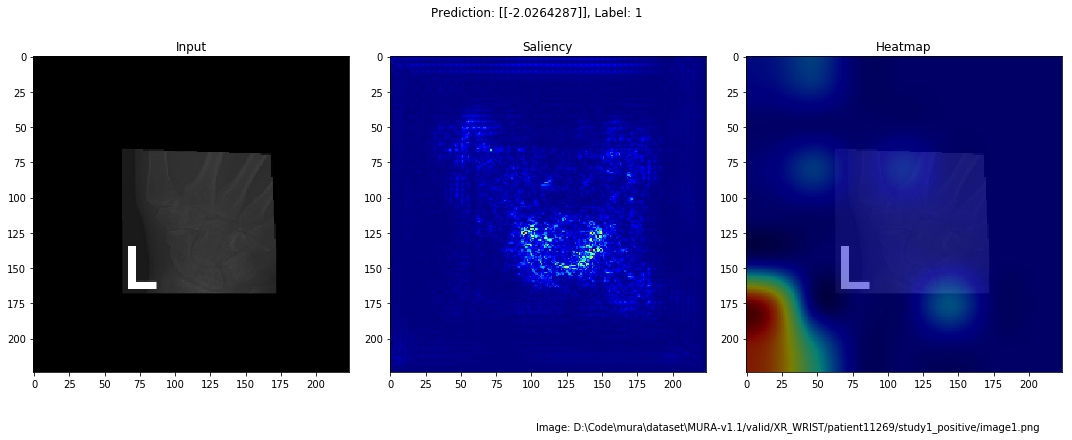

In [22]:
for _ in range(10):
    visualize.plt_attention(model_path, bpart=bpart, grayscale=grayscale)

#### Activation

In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

d:\code\mura\env\lib\site-packages\keras\models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


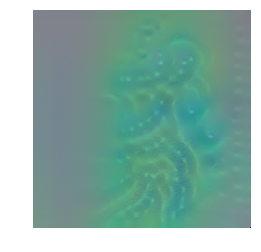

In [15]:
visualize.plt_activation(model_path, layer_idx=-1, max_iter=20000)

In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,910)

In [ ]:
visualize.plt_activation(model_path, layer_idx=util.find_last_conv2d(model.model))

## Compare to train a separate model for each body part

In [3]:
val_df = pd.read_csv("D:\\Code\\mura\\models\\densenet169\\results\\vgg_2018-07-15-2251.csv")

****** Building Model
****** Preparing Input
****** Preparing Training Image Generator
****** Loading Validation Inputs
****** Starting Training: 08-56-50

Epoch 00012: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.


d:\code\mura\env\lib\site-packages\keras\callbacks.py:437: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):
d:\code\mura\env\lib\site-packages\keras\callbacks.py:953: RuntimeWarning: invalid value encountered in less
  self.monitor_op = lambda a, b: np.less(a, b - self.min_delta)



Epoch 00017: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00027: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00032: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00037: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.
****** Training time: 3:01:07.850373
****** Writing Predictions
****** Evaluation per body part: wrist ******
****** Evaluation per Image
Accuracy:  0.8603945371775418
Recall:    0.7796610169491526
Precision: 0.8949416342412452
Kappa:     0.7142049043547123
Contingency Table:
  230             27
   65            337
Number of Inputs: 659
****** Evaluation per Study Using Highest Score
Accuracy:  0.8649789029535865
Recall:    0.865979381443299
Precision: 0.8155339805825242
Kappa:     0.7233933912028591
Contingency Table:
   84             19
   13            121
Number of Inputs: 237
***

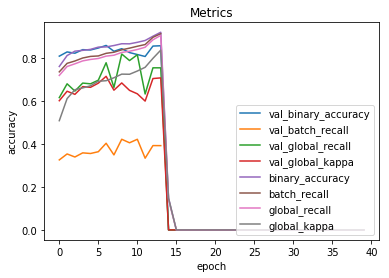

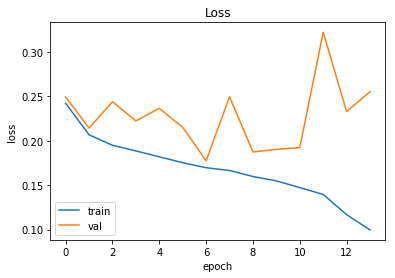

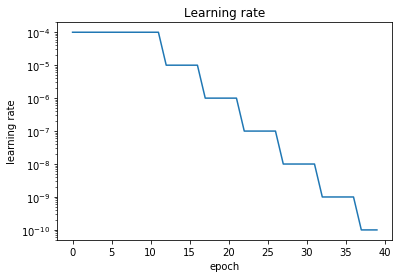




****** Building Model
****** Preparing Input
****** Preparing Training Image Generator
****** Loading Validation Inputs
****** Starting Training: 12-00-14

Epoch 00008: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 00018: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00023: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00028: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00033: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.

Epoch 00038: ReduceLROnPlateau reducing learning rate to 9.99999943962493e-12.
****** Training time: 0:54:03.669140
****** Writing Predictions
****** Evaluation per body part: forearm ******
****** Evaluation per Image
Accuracy:  0.7275747508305648
Recall:    0.8145695364238411
Precision: 0.6949152542372882
Kappa:     0.454830587091929
Contingency Tabl

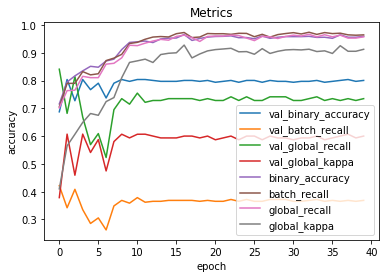

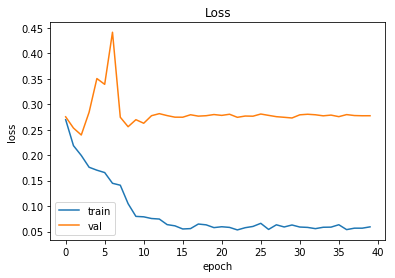

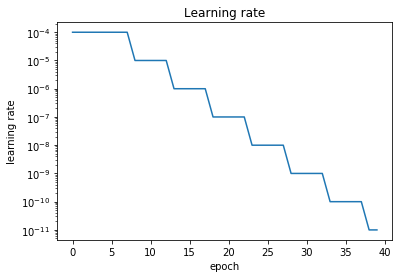




****** Building Model
****** Preparing Input
****** Preparing Training Image Generator
****** Loading Validation Inputs
****** Starting Training: 12-56-29

Epoch 00012: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00027: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00032: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00037: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.
****** Training time: 2:17:15.795028
****** Writing Predictions
****** Evaluation per body part: hand ******
****** Evaluation per Image
Accuracy:  0.7456521739130435
Recall:    0.5291005291005291
Precision: 0.78125
Kappa:     0.44763742353955405
Contingency Table:
  100             28
   89            243
Number of Inputs: 460
****** Evaluation per Stu

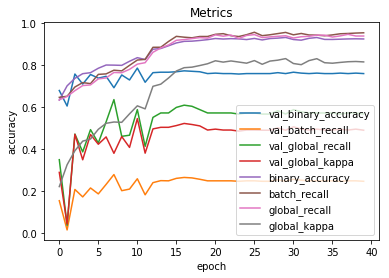

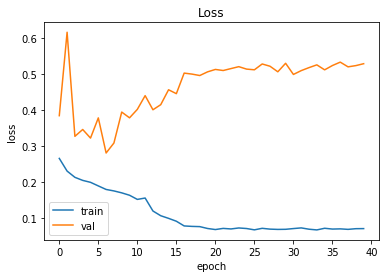

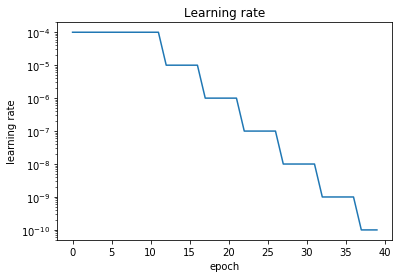




****** Building Model
****** Preparing Input
****** Preparing Training Image Generator
****** Loading Validation Inputs
****** Starting Training: 15-16-26

Epoch 00009: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 00014: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00024: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00029: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00034: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.

Epoch 00039: ReduceLROnPlateau reducing learning rate to 9.99999943962493e-12.
****** Training time: 0:47:14.666537
****** Writing Predictions
****** Evaluation per body part: humerus ******
****** Evaluation per Image
Accuracy:  0.8263888888888888
Recall:    0.8642857142857143
Precision: 0.7960526315789473
Kappa:     0.653312788906009
Contingency Tabl

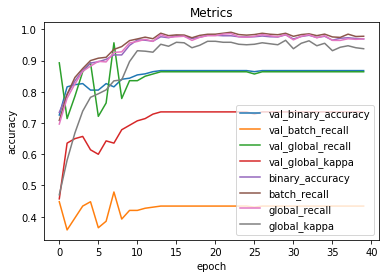

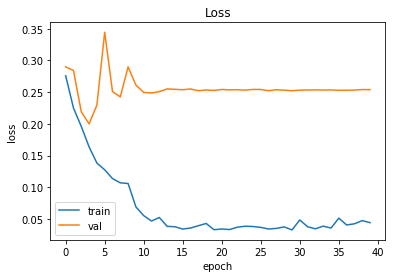

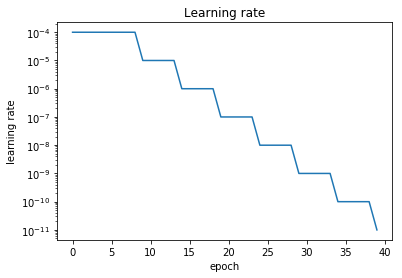




****** Building Model
****** Preparing Input
****** Preparing Training Image Generator
****** Loading Validation Inputs
****** Starting Training: 16-07-05

Epoch 00007: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 00012: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00027: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00032: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.

Epoch 00037: ReduceLROnPlateau reducing learning rate to 9.99999943962493e-12.
****** Training time: 4:41:31.134225
****** Writing Predictions
****** Evaluation per body part: shoulder ******
****** Evaluation per Image
Accuracy:  0.7850799289520426
Recall:    0.7266187050359713
Precision: 0.8178137651821862
Kappa:     0.5695038643099534
Contingency Ta

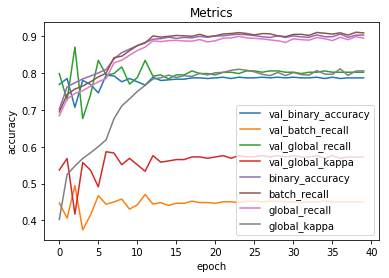

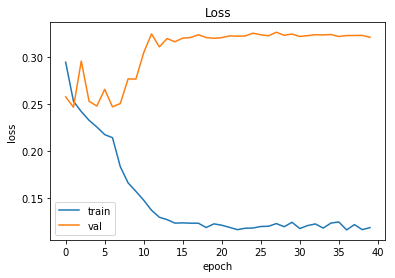

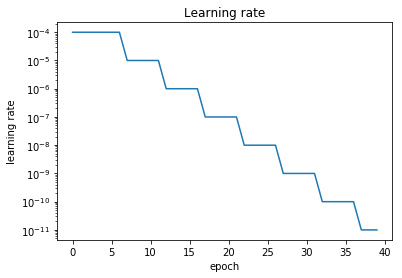




****** Building Model
****** Preparing Input
****** Preparing Training Image Generator
****** Loading Validation Inputs
****** Starting Training: 20-53-26


In [7]:
for bp in val_df["body_part"].unique():
    md = densenet169.DenseNet169(grayscale=grayscale, weight=weight, resize=resize)
    hs, mp, rp = md.train(batch_size=batch_size, learning_rate=learning_rate, epochs=epochs, bpart=bp, decay=decay, verbose=0)
    print("****** Evaluation per body part: {} ******".format(bp))
    evaluate.evl_result(pd.read_csv(rp))
    visualize.plot_history(hs)
    print("\n\n")

****** Building Model
****** Preparing Input
****** Preparing Training Image Generator
****** Loading Validation Inputs
****** Starting Training: 08-38-24

Epoch 00006: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 00011: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 00016: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00021: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00026: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00031: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.

Epoch 00036: ReduceLROnPlateau reducing learning rate to 9.99999943962493e-12.
****** Training time: 1:35:47.356036
****** Writing Predictions
****** Evaluation per body part: finger ******
****** Evaluation per Image
Accuracy:  0.720173535791757
Recall:    0.757085020242915
Precision: 0.73046875
Kappa:     0.4358796801335621
Contingency Table:
  187     

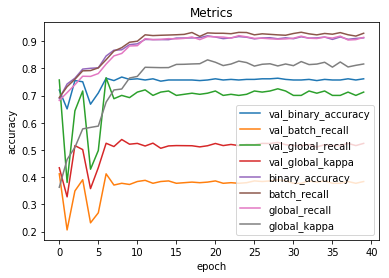

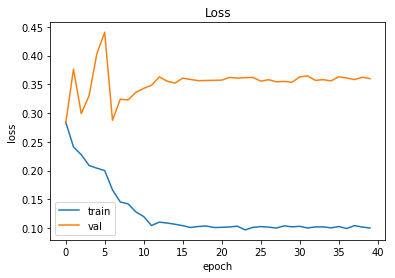

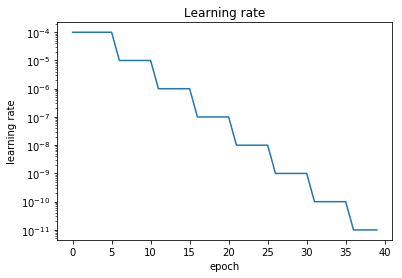




****** Building Model
****** Preparing Input
****** Preparing Training Image Generator
****** Loading Validation Inputs
****** Starting Training: 10-15-57

Epoch 00009: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.


d:\code\mura\env\lib\site-packages\keras\callbacks.py:437: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):
d:\code\mura\env\lib\site-packages\keras\callbacks.py:953: RuntimeWarning: invalid value encountered in less
  self.monitor_op = lambda a, b: np.less(a, b - self.min_delta)



Epoch 00015: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 00020: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00030: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00035: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.

Epoch 00040: ReduceLROnPlateau reducing learning rate to 9.99999943962493e-12.
****** Training time: 1:51:57.810261
****** Writing Predictions
****** Evaluation per body part: elbow ******
****** Evaluation per Image
Accuracy:  0.8451612903225807
Recall:    0.7913043478260869
Precision: 0.883495145631068
Kappa:     0.6899425819596219
Contingency Table:
  182             24
   48            211
Number of Inputs: 465
****** Evaluation per Study Using Highest Score
Accuracy:  0.810126582278481
Recall:    0.8181818181818182
Precision: 0.75
Kappa:     0.6146341463414631
Contingency Table:
  

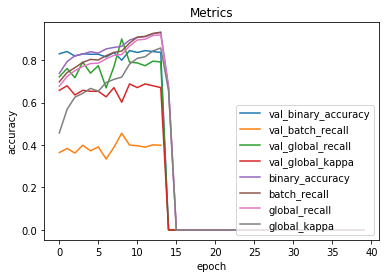

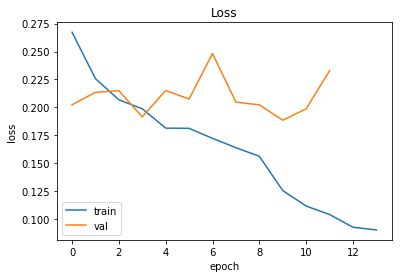

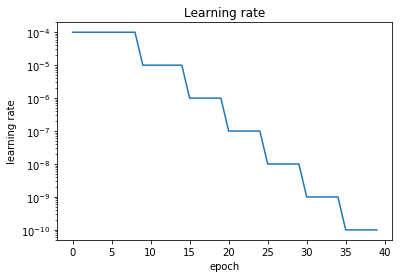




****** Building Model
****** Preparing Input
****** Preparing Training Image Generator
****** Loading Validation Inputs
****** Starting Training: 12-10-14

Epoch 00008: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 00018: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00023: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00028: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00033: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.

Epoch 00038: ReduceLROnPlateau reducing learning rate to 9.99999943962493e-12.
****** Training time: 3:50:58.904365
****** Writing Predictions
****** Evaluation per body part: wrist ******
****** Evaluation per Image
Accuracy:  0.8391502276176024
Recall:    0.7593220338983051
Precision: 0.8648648648648649
Kappa:     0.6709284139516474
Contingency Table

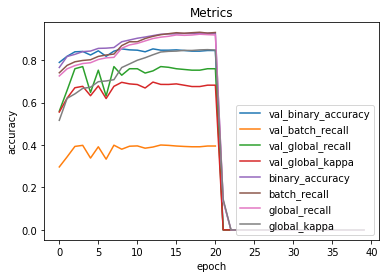

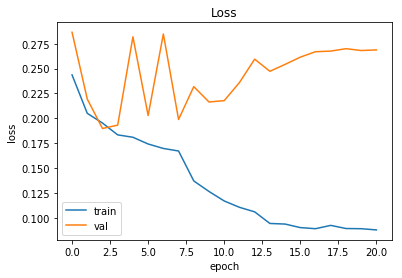

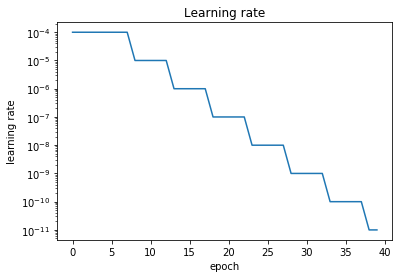

In [6]:
for bp in ["finger", "elbow", "wrist"]:
    md = densenet169.DenseNet169(grayscale=grayscale, weight=weight, resize=resize)
    hs, mp, rp = md.train(batch_size=batch_size, learning_rate=learning_rate, epochs=epochs, bpart=bp, decay=decay, verbose=0)
    print("****** Evaluation per body part: {} ******".format(bp))
    evaluate.evl_result(pd.read_csv(rp))
    visualize.plot_history(hs)
    print("\n\n")

## Training all body parts together vs Training each body part separately

From the above result, it is clear that for all body parts, training together yeilds better result than doing so separately.

However it is interesting to see for each body part, how validation loss moves relative to decrease in training loss. For all body parts, validation loss tends to stablize after 5 epoches, but after that, some tends to stay flat(e.g. humerus and forearm) while others tends to go upward(e.g. shoulder). It shows that different body parts suffers differently from the overfitting problem.